<a href="https://colab.research.google.com/github/test-tlib/unum-project/blob/main/unum_project_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data=pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')


data.head()




,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
print(data.isnull().sum())

data.dropna(inplace=True)

data.drop_duplicates(inplace=True)


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [ ]:

print(data.columns)


data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed', dayfirst=True, errors='coerce')


data.dropna(subset=['Order Date'], inplace=True)



data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year



Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Order Day', 'Order Month', 'Order Year'],
      dtype='object')


In [ ]:

if 'Order Date' in data.columns:
    data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed', dayfirst=True, errors='coerce')
    data.dropna(subset=['Order Date'], inplace=True)
    data['Order Month'] = data['Order Date'].dt.month
else:
    print("Warning: 'Order Date' column not found. Cannot create 'Order Month'.")



le = LabelEncoder()


data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])

if 'Order Month' in data.columns:
    data['Order Month'] = le.fit_transform(data['Order Month'])
else:
    print("Error: 'Order Month' column still not found for encoding.")



print(data.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-08-11       2   
1      OD2         Sudha         1            13     8 2017-08-11       3   
2      OD3       Hussain         3             0    13 2017-12-06       4   
3      OD4       Jackson         4            12     4 2016-11-10       3   
4      OD5       Ridhesh         3            18    12 2016-11-10       3   

   Sales  Discount  Profit  State  Order Month  
0   1254      0.12  401.28      0            7  
1    749      0.18  149.80      0            7  
2   2360      0.21  165.20      0           11  
3    896      0.25   89.60      0           10  
4   2355      0.26  918.45      0           10  


<ipython-input-20-a50c0a8b5cf7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


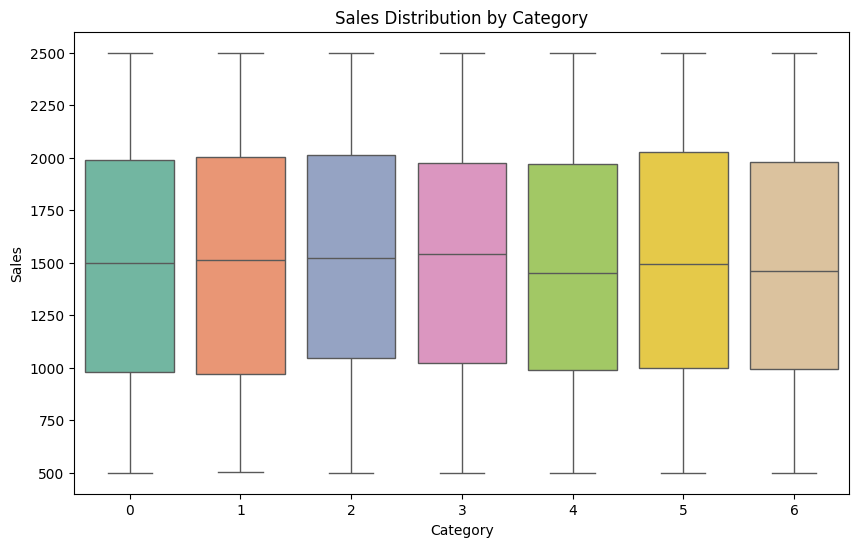

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


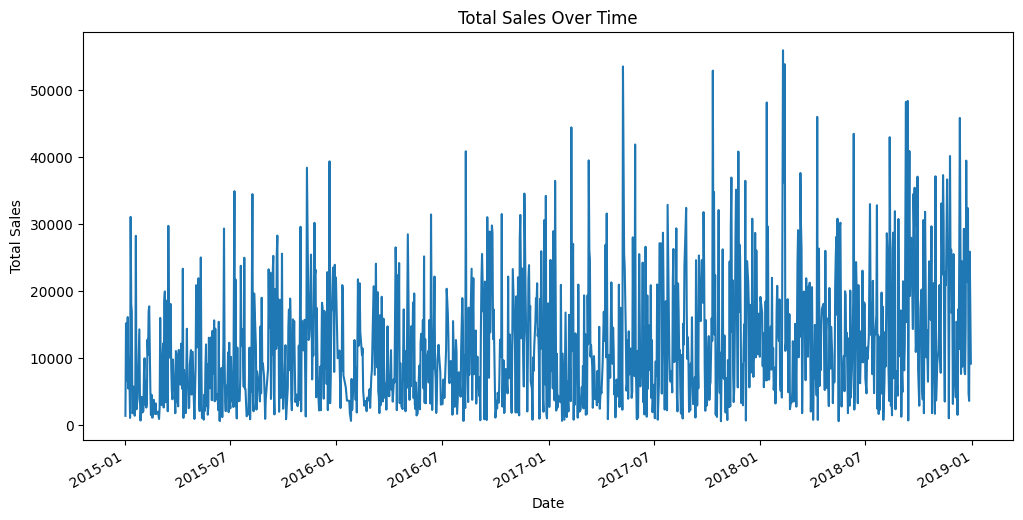

In [ ]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

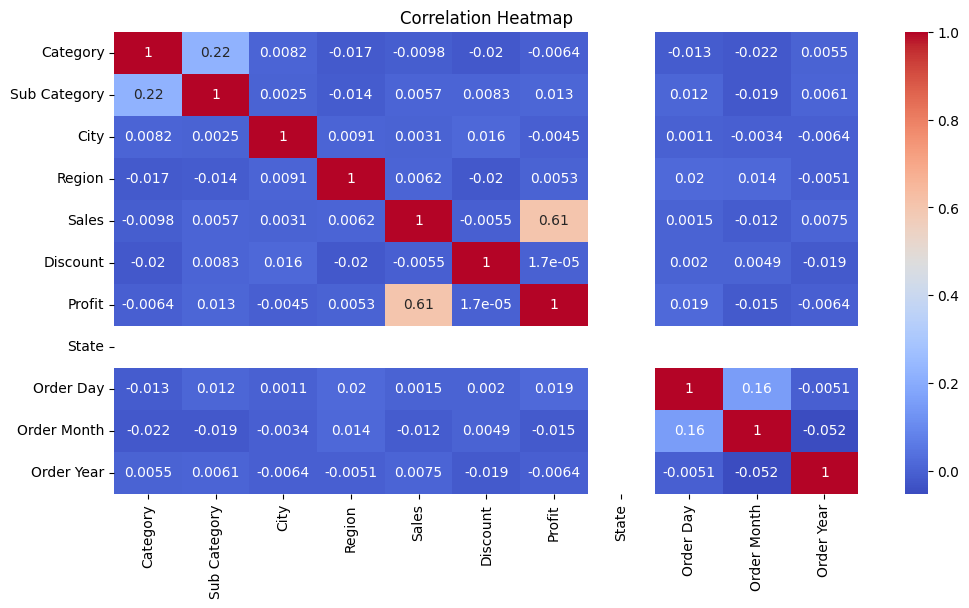

In [ ]:
plt.figure(figsize=(12, 6))
numeric_data = data.select_dtypes(include=np.number)
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
features = data.drop(columns=['Order ID', 'Customer Name','Order Date', 'Sales'])
target = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 212968.924794181
R-squared: 0.35428077144108516


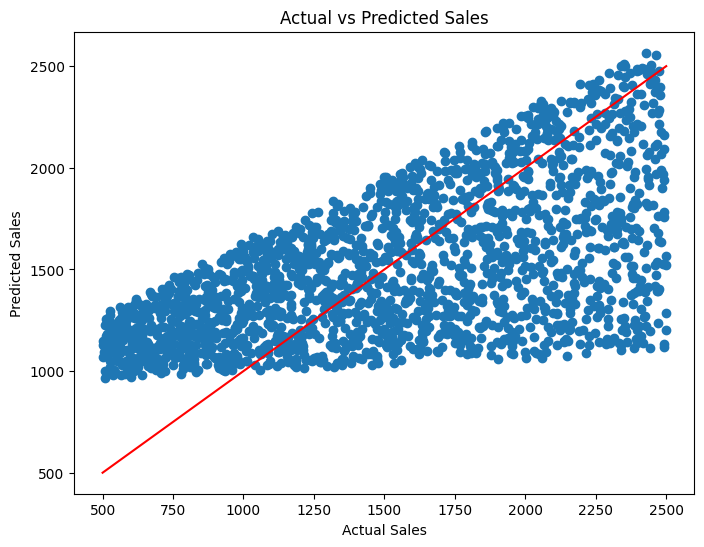

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [ ]:
da=data.groupby("Category")
da.first()

,Order ID,Customer Name,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
Category,,,,,,,,,,,,,
0,OD9,Hafiz,1,19,2015-09-06,4,791,0.23,181.93,0,6,8,2015
1,OD2,Sudha,13,8,2017-08-11,3,749,0.18,149.80,0,11,7,2017
2,OD12,Yadav,9,11,2015-09-06,4,701,0.10,308.44,0,6,8,2015
3,OD3,Hussain,0,13,2017-12-06,4,2360,0.21,165.20,0,6,11,2017
4,OD4,Jackson,12,4,2016-11-10,3,896,0.25,89.60,0,10,10,2016
5,OD1,Harish,14,21,2017-08-11,2,1254,0.12,401.28,0,11,7,2017
6,OD11,Ganesh,5,7,2015-09-06,4,1903,0.13,437.69,0,6,8,2015


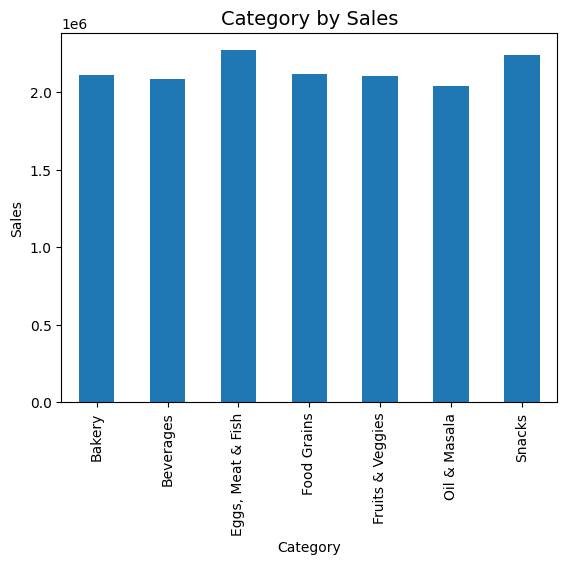

In [ ]:
Sales_category=df.groupby("Category")["Sales"].sum()

Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-08-11       2   
1      OD2         Sudha         1            13     8 2017-08-11       3   
2      OD3       Hussain         3             0    13 2017-12-06       4   
3      OD4       Jackson         4            12     4 2016-11-10       3   
4      OD5       Ridhesh         3            18    12 2016-11-10       3   

   Sales  Discount  Profit  State  Order Month  Order Day  Order Year  
0   1254      0.12  401.28      0            8         11        2017  
1    749      0.18  149.80      0            8         11        2017  
2   2360      0.21  165.20      0           12          6        2017  
3    896      0.25   89.60      0           11         10        2016  
4   2355      0.26  918.45      0           11         10        2016  


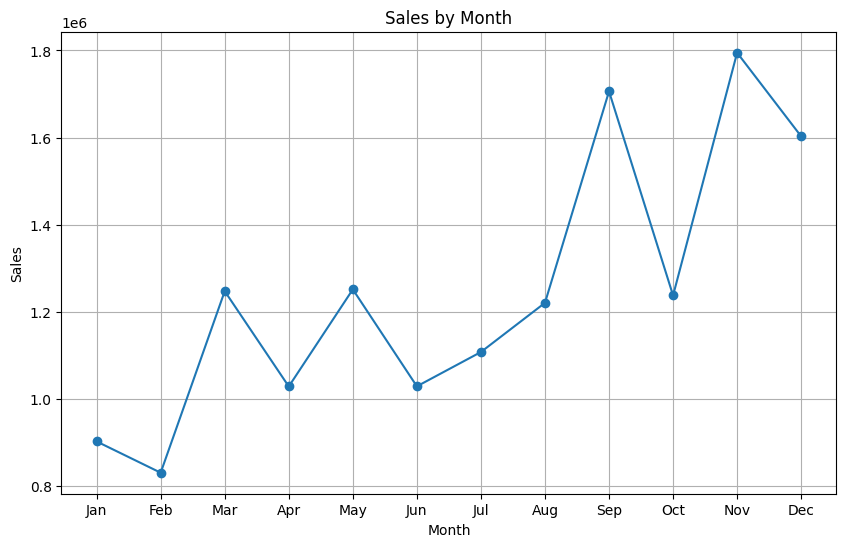

In [ ]:

data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year


le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])


print(data.head())




monthly_sales = data.groupby('Order Month')['Sales'].sum().reset_index()

monthly_sales_sorted = monthly_sales.sort_values(by='Order Month')

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Order Month'],
monthly_sales_sorted['Sales'], marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.xticks(monthly_sales_sorted['Order Month'], ['Jan', 'Feb', 'Mar',
'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

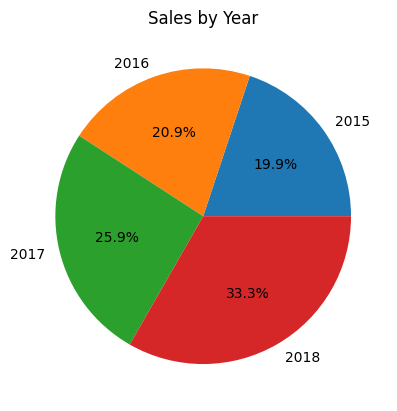

In [ ]:
Yearly_Sales=data.groupby("Order Year")["Sales"].sum()

plt.pie(Yearly_Sales, labels=Yearly_Sales.index,
autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()


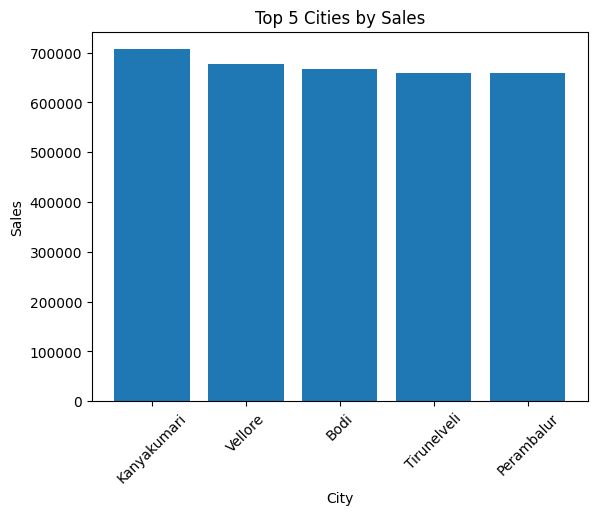

In [ ]:
city_sales = df[['City', 'Sales']]

total_sales = city_sales.groupby('City').sum()

sorted_cities = total_sales.sort_values(by='Sales',
ascending=False)

top_cities = sorted_cities.head(5)

plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()